In [1]:
!pip3 install imblearn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.12 -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv("/Users/danort/Desktop/Ironhack labs/unit4/cleaning-categorical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
# Standardize column names as PB8 snake case
df.columns = df.columns.str.lower().str.replace(" ", "_")


# 3. This is what I would do with the customer_id column

In [5]:
#use it as an index
df.set_index('customer', inplace=True)
df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


# 4. Load the continuous and discrete variables into numericals_df and categorical_df variables.

In [6]:


# Identify continuous variables (float64 or int64)
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Identify discrete variables (object or int64 with limited unique values)
categorical_df = df.select_dtypes(include=['object', 'int64'])

# Check unique values in each column of the categorical_df
unique_counts = df.nunique()

# Identify columns with a limited number of unique values (threshold set to 10 in this example)
discrete_columns = unique_counts[unique_counts <= 10].index
categorical_df = df[discrete_columns]

# Display the resulting DataFrames
print("Numerical DataFrame:")
print(numerical_df.head())

print("\nCategorical DataFrame:")
print(categorical_df.head())


Numerical DataFrame:
          customer_lifetime_value  income  monthly_premium_auto  \
customer                                                          
BU79786               2763.519279   56274                    69   
QZ44356               6979.535903       0                    94   
AI49188              12887.431650   48767                   108   
WW63253               7645.861827       0                   106   
HB64268               2813.692575   43836                    73   

          months_since_last_claim  months_since_policy_inception  \
customer                                                           
BU79786                        32                              5   
QZ44356                        13                             42   
AI49188                        18                             38   
WW63253                        18                             65   
HB64268                        12                             44   

          number_of_open_complai

# 5 Plot every categorical variable. What can you see in the plots?

In [7]:
categoricals = df.select_dtypes(object)

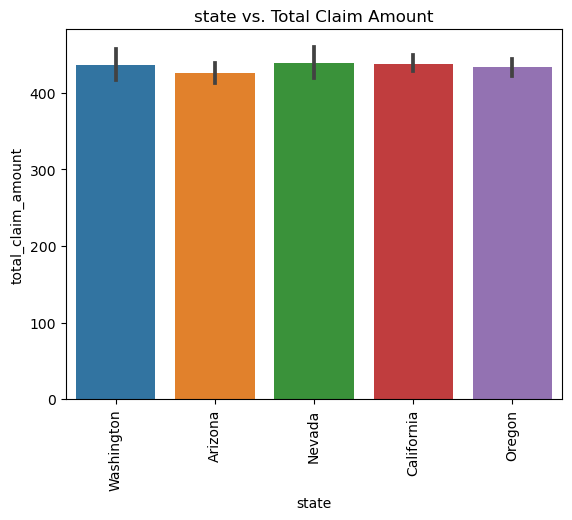

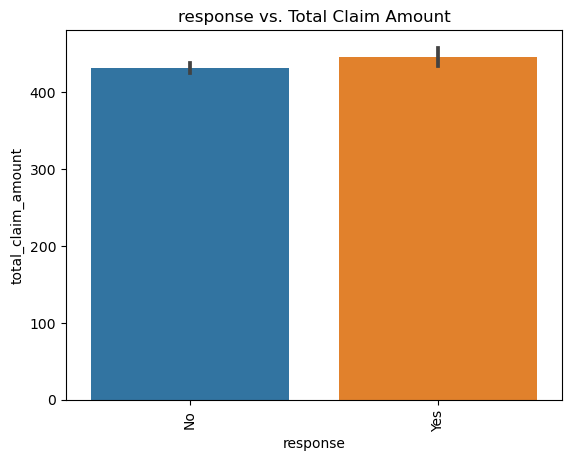

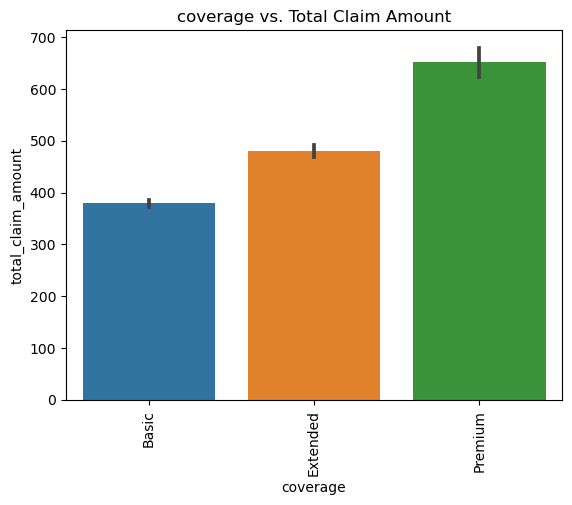

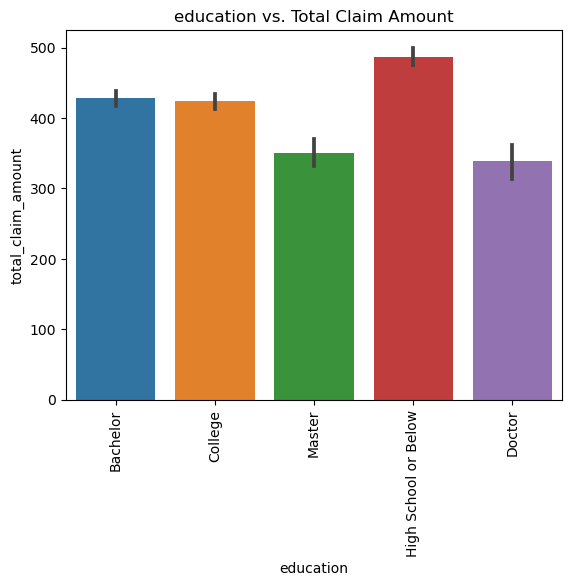

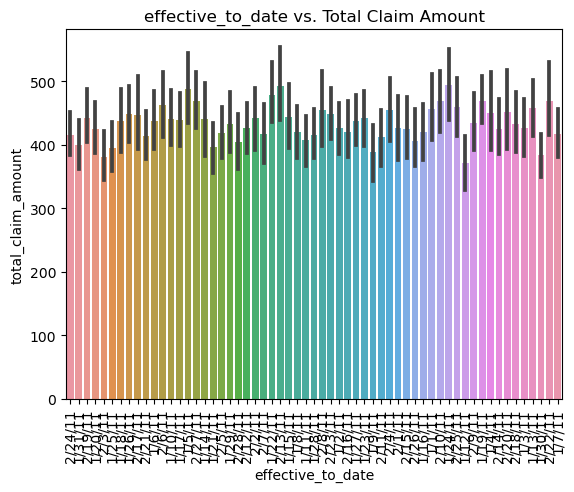

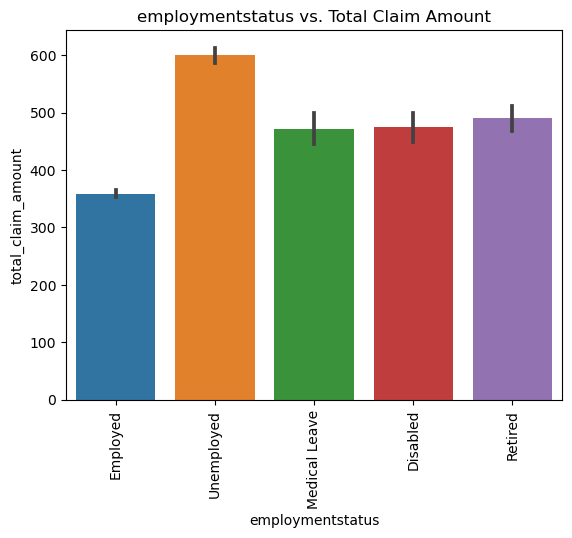

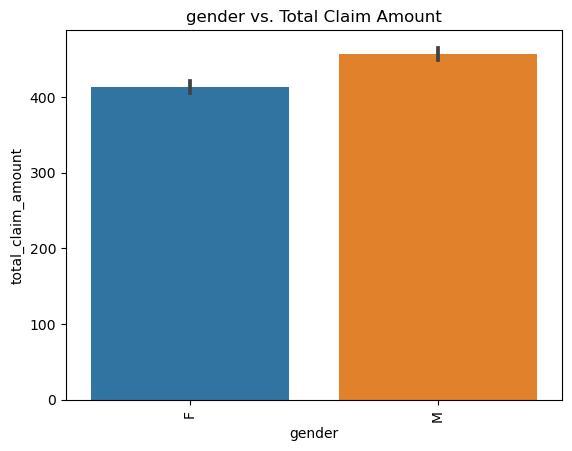

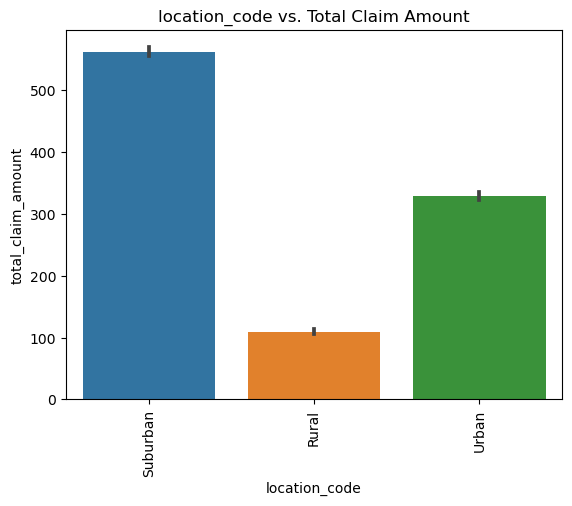

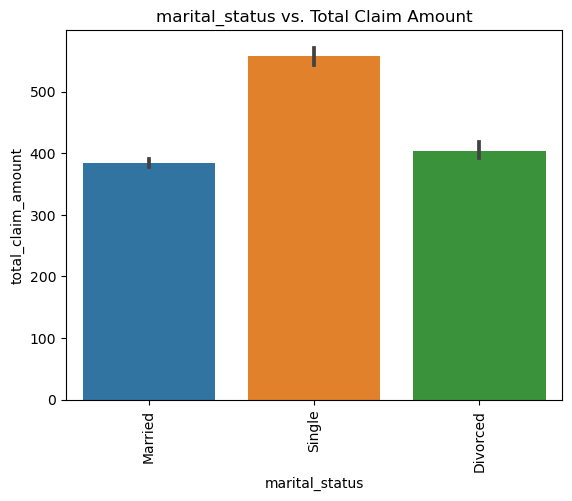

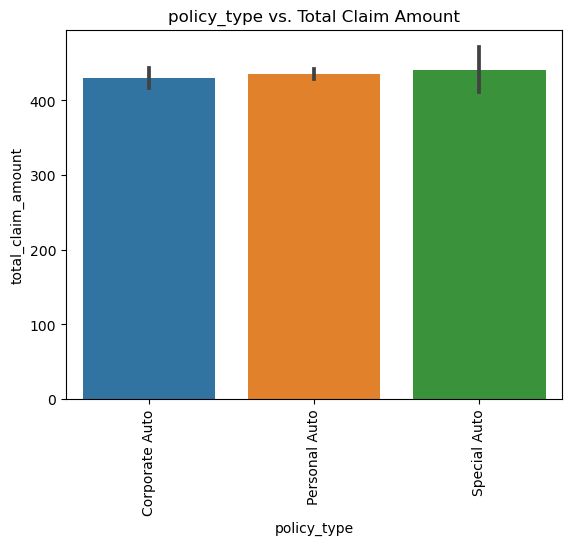

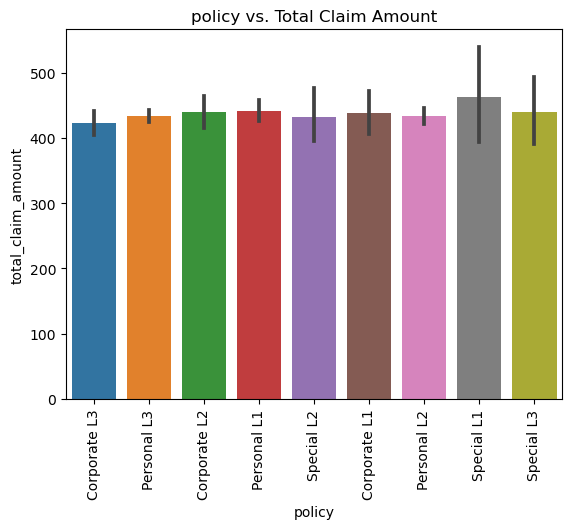

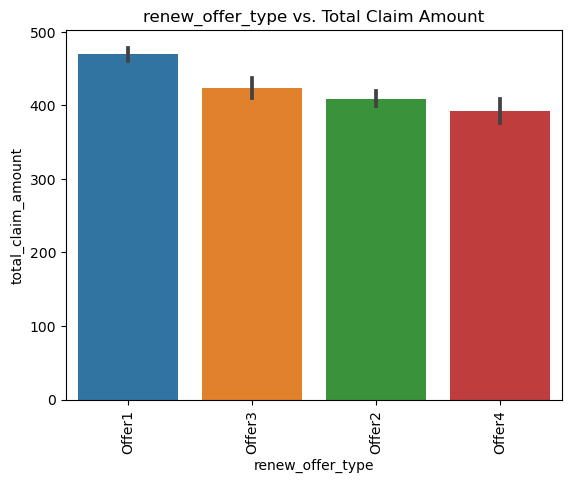

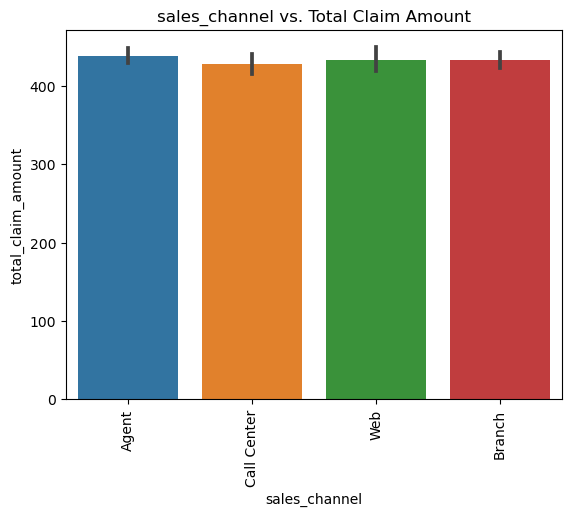

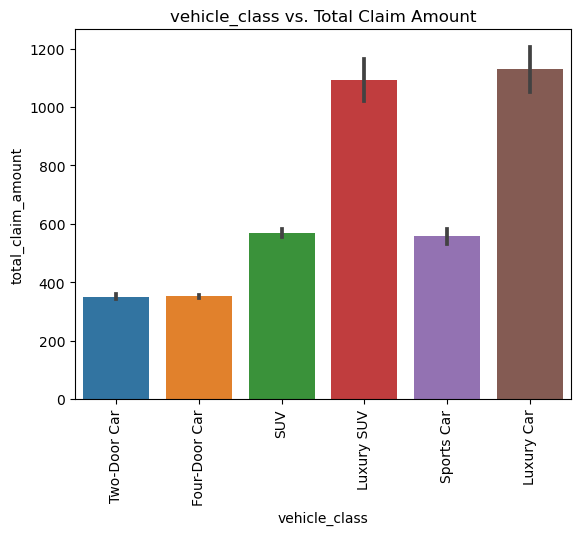

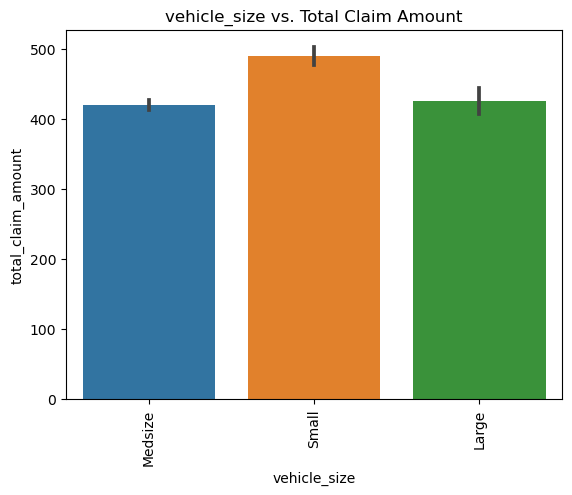

In [8]:
for col in categoricals.columns:
    sns.barplot(x=col, y='total_claim_amount', data=df)
    plt.xticks(rotation=90)
    plt.title(f'{col} vs. Total Claim Amount')
    plt.show()
    
    # we can visualize the average or total value of the target variable for each category.
    # We can also countplot our categorical vrs the target value to see the distribution.

# 6. For the categorical data, check if there is any data cleaning that need to perform, using the funtion value_counts()

In [10]:
for col in categoricals.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: state
state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64


Column: response
response
No     7826
Yes    1308
Name: count, dtype: int64


Column: coverage
coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64


Column: education
education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64


Column: effective_to_date
effective_to_date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11  